<a href="https://colab.research.google.com/github/202160454-cmd/practica_repo/blob/master/Storytelling_de_inquilinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling de inquilinos
## Alumna: Lizzette Martínez Contreras, 202160454

### Importación de librerías

In [ ]:
# Manipulación y visualización
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Métricas y evaluación
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

Para comenzar el análisis, se importaron las librerías necesarias para la manipulación, visualización y modelado de datos.
Pandas y NumPy fueron las herramientas principales para el manejo de estructuras y operaciones con los datos, mientras que Seaborn y Matplotlib permitieron dar un toque visual al análisis mediante gráficos claros y comparativos.

En la parte de modelado, se integraron diferentes funciones de scikit-learn, útiles para el preprocesamiento, la codificación de variables y la evaluación de modelos.
Entre los algoritmos utilizados se encuentran Regresión Logística, Random Forest y Gradient Boosting, tres enfoques distintos que permiten comparar precisión y desempeño.

Finalmente, se incorporaron métricas como accuracy, f1-score y la matriz de confusión, fundamentales para evaluar el rendimiento de los modelos y medir qué tan bien logran clasificar las observaciones.

### Asignación de estilo de gráficos

In [ ]:
# Configuración base del estilo gráfico
sns.set(
    style="whitegrid",       # Fondo con cuadrícula clara
    palette="muted",         # Paleta de colores suaves
    font_scale=1.1,          # Tamaño de fuente más grande para legibilidad
    rc={
        "axes.titlesize": 13,    # Tamaño del título de cada gráfico
        "axes.labelsize": 11,    # Tamaño de las etiquetas de ejes
        "figure.figsize": (8, 4),# Tamaño por defecto de las figuras
        "axes.facecolor": "#f9f9f9", # Color de fondo ligeramente gris claro
        "grid.alpha": 0.3,       # Transparencia de la cuadrícula
    }
)

plt.rcParams['figure.dpi'] = 120  # mejora la nitidez de las figuras
plt.rcParams['savefig.dpi'] = 300 # resolución alta si exportas imágenes
plt.rcParams['axes.edgecolor'] = '#444444'
plt.rcParams['axes.linewidth'] = 0.8

Antes de comenzar con las visualizaciones, se definió un estilo gráfico uniforme para mantener coherencia en todos los gráficos del análisis.
Se utilizó el tema “whitegrid” de Seaborn, que proporciona un fondo claro con cuadrícula suave, ideal para resaltar los contrastes y facilitar la lectura de las figuras.

Además, se ajustaron detalles como:

- Paleta de colores “muted”, con tonos suaves que no distraen del contenido.

- Tamaños personalizados para títulos, etiquetas y figuras, garantizando buena visibilidad.

- Color de fondo ligeramente gris (#f9f9f9) y transparencia en las líneas de la cuadrícula para un acabado más limpio.

- Finalmente, se aumentó la resolución (dpi) de las figuras para lograr una mejor nitidez al exportarlas o presentarlas.

Con esta configuración le da a todo el proyecto una estética más profesional y una lectura más cómoda para el lector.

### Carga inicial de los datos

Con el entorno listo, el siguiente paso fue cargar el conjunto de datos principal, llamado ds_inquilinos.csv.

Este dataset contiene información sobre 12,000 registros y 18 variables, que describen distintos aspectos del estilo de vida y preferencias personales de los inquilinos: desde hábitos como el horario o el tipo de música, hasta variables sociales como el plan perfecto o si tocan algún instrumento.

In [ ]:
# Carga del dataset
df = pd.read_csv("ds_inquilinos.csv")

# Dimensiones y primeras filas
print(f"Dimensiones del dataset: {df.shape}")
display(df.head())

# Información general
print("\nInformación del dataset:")
df.info()

# Verificación de valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isna().sum())

Dimensiones del dataset: (12000, 18)


,id_inquilino,horario,ritmo,animacion,nivel_educativo,cine,leer,deporte,mascotas,comida,dieta,fumador,visitas,orden,musica_tipo,musica_alta,plan_perfecto,instrumento
0,1,noche,nocturno,si,secundaria,si,no,no,con mascotas,pedir comida,si,si,si,relajada,reggaeton,no,casa,si
1,2,noche,nocturno,no,secundaria,no,no,no,con mascotas,pedir comida,no,si,si,relajada,reggaeton,si,casa,si
2,3,noche,madrugador,no,universitaria,no,no,si,con mascotas,pedir comida,no,si,no,ordenada,pop,no,casa,no
3,4,noche,nocturno,no,universitaria,si,si,no,con mascotas,pedir comida,no,no,si,relajada,rock,si,casa,si
4,5,ma√±ana,nocturno,si,universitaria,no,no,no,sin mascotas,cocinar,no,no,no,relajada,pop,no,casa,no



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_inquilino     12000 non-null  int64 
 1   horario          12000 non-null  object
 2   ritmo            12000 non-null  object
 3   animacion        12000 non-null  object
 4   nivel_educativo  12000 non-null  object
 5   cine             12000 non-null  object
 6   leer             12000 non-null  object
 7   deporte          12000 non-null  object
 8   mascotas         12000 non-null  object
 9   comida           12000 non-null  object
 10  dieta            12000 non-null  object
 11  fumador          12000 non-null  object
 12  visitas          12000 non-null  object
 13  orden            12000 non-null  object
 14  musica_tipo      12000 non-null  object
 15  musica_alta      12000 non-null  object
 16  plan_perfecto    12000 non-null  object
 17  instr

Este dataset contiene información sobre 12,000 registros y 18 variables, que describen distintos aspectos del estilo de vida y preferencias personales de los inquilinos: desde hábitos como el horario o el tipo de música, hasta variables sociales como el plan perfecto o si tocan algún instrumento.

Al revisar las primeras filas, se observan variables categóricas (como horario, ritmo, nivel educativo o tipo de música) que servirán más adelante para analizar patrones de comportamiento y preferencias.

Además, el reporte general (df.info()) confirmó que todas las columnas contienen datos completos, sin valores nulos. Esto garantiza una base sólida para continuar con el análisis sin necesidad de imputaciones o limpiezas adicionales.

### Limpieza y preparación de datos

In [ ]:
# 1. Imputación segura: solo actúa si existieran nulos

cat_cols = [
    'horario', 'ritmo', 'animacion', 'nivel_educativo', 'cine', 'leer', 'deporte',
    'mascotas', 'comida', 'dieta', 'fumador', 'visitas', 'orden',
    'musica_tipo', 'musica_alta', 'plan_perfecto', 'instrumento'
]

num_cols = []  # Si luego agregas columnas numéricas, colócalas aquí (por ejemplo, 'edad')

# Relleno de categóricas con la moda (valor más frecuente)
for c in cat_cols:
    if c in df.columns and df[c].isna().sum() > 0:
        df[c] = df[c].fillna(df[c].mode()[0])

# Relleno de numéricas con la mediana (si existieran)
for c in num_cols:
    if c in df.columns and df[c].isna().sum() > 0:
        df[c] = df[c].fillna(df[c].median())

Aunque el dataset no presentaba valores nulos, se incluyó un proceso automatizado de imputación para garantizar la robustez del código y asegurar que, en caso de que se incorporen nuevos datos en el futuro, el sistema pueda gestionarlos sin errores.

Se dividieron las variables en dos grupos principales:

1. Categóricas: como horario, ritmo, nivel educativo o tipo de música, que serían rellenadas con la moda (el valor más frecuente) si llegaran a presentar vacíos.

2. Numéricas: que serían completadas con la mediana, evitando que los valores extremos distorsionen el análisis.

Esta práctica refuerza la calidad del dataset y permite mantener una base consistente y preparada para cualquier transformación posterior, incluso en escenarios donde los datos cambien o se amplíen.

In [ ]:
# 2. Limpieza de columnas irrelevantes

# Eliminamos columnas que no aportan información para el modelo
drop_cols = [c for c in ['id_inquilino'] if c in df.columns]
df = df.drop(columns=drop_cols)

En esta etapa se eliminó la columna id_inquilino, ya que su función era únicamente identificar cada registro y no aportaba información útil para el modelo predictivo.
Este tipo de variables, conocidas como identificadores, pueden generar ruido o sesgo en el entrenamiento, ya que no guardan relación con los patrones de comportamiento que se buscan analizar.

In [ ]:
# 3. Validación del proceso de limpieza

print("✅ Datos después del proceso de limpieza y transformación:\n")
display(df.head())
print("\nDimensiones del dataset limpio:", df.shape)
print("\nValores nulos por columna:\n")
print(df.isna().sum())

✅ Datos después del proceso de limpieza y transformación:



,horario,ritmo,animacion,nivel_educativo,cine,leer,deporte,mascotas,comida,dieta,fumador,visitas,orden,musica_tipo,musica_alta,plan_perfecto,instrumento
0,noche,nocturno,si,secundaria,si,no,no,con mascotas,pedir comida,si,si,si,relajada,reggaeton,no,casa,si
1,noche,nocturno,no,secundaria,no,no,no,con mascotas,pedir comida,no,si,si,relajada,reggaeton,si,casa,si
2,noche,madrugador,no,universitaria,no,no,si,con mascotas,pedir comida,no,si,no,ordenada,pop,no,casa,no
3,noche,nocturno,no,universitaria,si,si,no,con mascotas,pedir comida,no,no,si,relajada,rock,si,casa,si
4,ma√±ana,nocturno,si,universitaria,no,no,no,sin mascotas,cocinar,no,no,no,relajada,pop,no,casa,no



Dimensiones del dataset limpio: (12000, 17)

Valores nulos por columna:

horario            0
ritmo              0
animacion          0
nivel_educativo    0
cine               0
leer               0
deporte            0
mascotas           0
comida             0
dieta              0
fumador            0
visitas            0
orden              0
musica_tipo        0
musica_alta        0
plan_perfecto      0
instrumento        0
dtype: int64


Una vez completada la depuración del dataset, se realizó una verificación del resultado final para asegurarse de que no existieran valores nulos ni columnas irrelevantes.

En esta etapa se imprimieron las primeras filas del conjunto de datos limpio y se confirmó que el dataset final cuenta con 12,000 registros y 17 variables, todas completas y sin valores faltantes.

Esta validación es fundamental, ya que garantiza que los datos están listos para su transformación y modelado, evitando errores futuros en las fases de entrenamiento y evaluación del modelo.

### Análisis visual del comportamiento de los inquilinos

Para comenzar la exploración visual, se analizó la distribución de inquilinos según si tienen o no mascotas.
Este gráfico permite observar de forma clara el equilibrio entre ambos grupos dentro del conjunto de datos.

/tmp/ipython-input-3958375003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


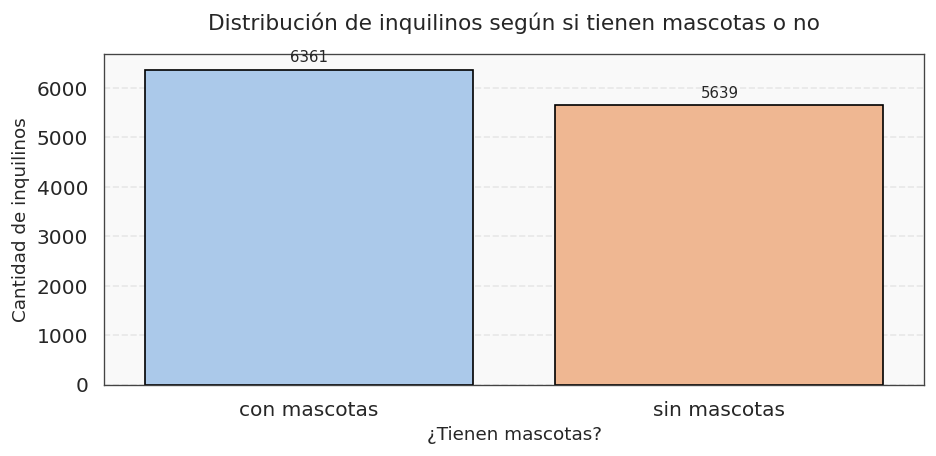

In [ ]:
# Gráfico de "Distribución de inquilinos según si tienen mascotas o no"

# Configuración del gráfico
plt.figure(figsize=(8, 4))
sns.countplot(
    x='mascotas',
    data=df,
    palette='pastel',
    edgecolor='black'
)

# Personalización del gráfico
plt.title('Distribución de inquilinos según si tienen mascotas o no', fontsize=13, pad=15)
plt.xlabel('¿Tienen mascotas?', fontsize=11)
plt.ylabel('Cantidad de inquilinos', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Añadimos etiquetas con valores encima de las barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

A primera vista, se aprecia que una ligera mayoría, 6,361 inquilinos, tienen mascotas, frente a 5,639 que no.

Esto sugiere que la tenencia de mascotas es un rasgo común entre los inquilinos, y podría tener alguna relación con otros comportamientos, como el tipo de vivienda o las actividades recreativas.

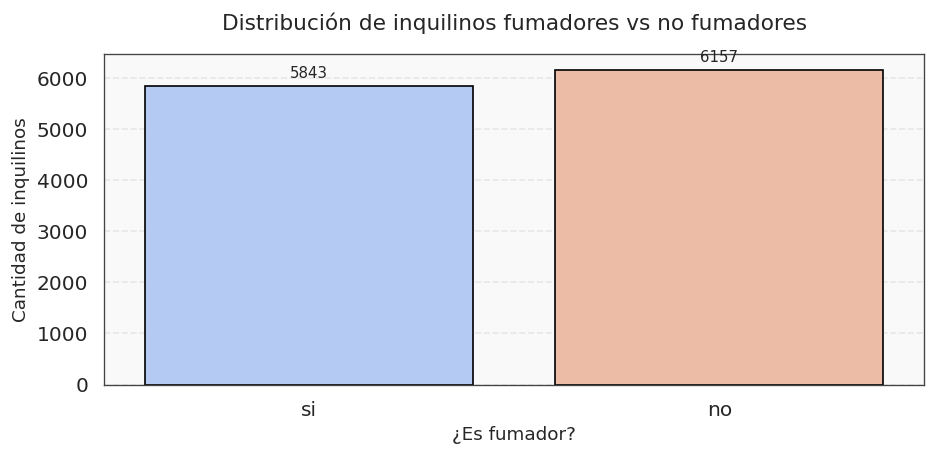

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='fumador',
    hue='fumador',                # evita el warning y aplica la paleta correctamente
    palette='coolwarm',
    legend=False,                 # oculta leyenda redundante
    edgecolor='black'
)

# Personalización
plt.title('Distribución de inquilinos fumadores vs no fumadores', fontsize=13, pad=15)
plt.xlabel('¿Es fumador?', fontsize=11)
plt.ylabel('Cantidad de inquilinos', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Etiquetas con valores encima de las barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

Aquí se exploró la proporción de inquilinos fumadores frente a los no fumadores, con el fin de identificar si este hábito tiene una presencia significativa dentro del conjunto de datos.

El gráfico muestra una distribución bastante equilibrada:

- 5,843 inquilinos se declararon fumadores.

- 6,157 inquilinos indicaron no fumar.

Aunque las cifras son cercanas, se observa una ligera mayoría de no fumadores, lo cual podría ser relevante al relacionar este comportamiento con otros factores de estilo de vida, como la práctica de deporte o las preferencias alimenticias.

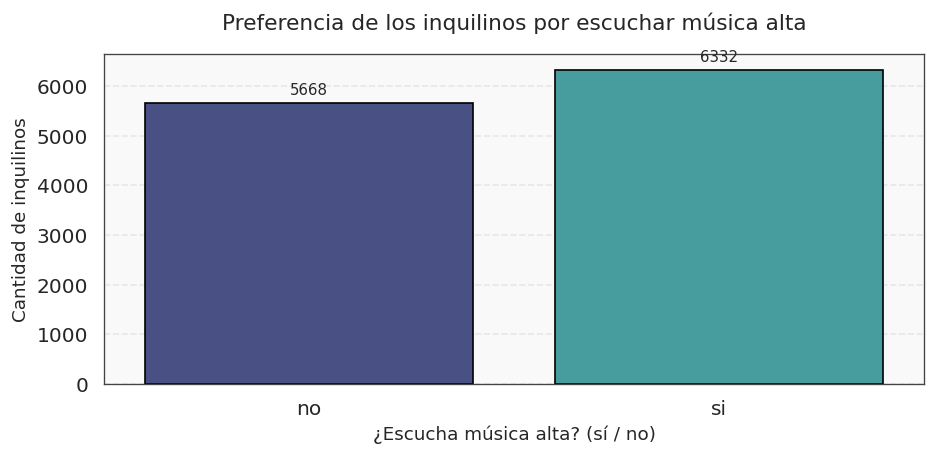

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df,
    x='musica_alta',
    hue='musica_alta',        # Evita el warning y aplica la paleta
    palette='mako',
    legend=False,
    edgecolor='black'
)

# Personalización del gráfico
plt.title('Preferencia de los inquilinos por escuchar música alta', fontsize=13, pad=15)
plt.xlabel('¿Escucha música alta? (sí / no)', fontsize=11)
plt.ylabel('Cantidad de inquilinos', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Añadimos etiquetas de conteo encima de las barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

En este gráfico se analiza la preferencia de los inquilinos por escuchar música a alto volumen, un rasgo que puede reflejar diferencias de personalidad o estilo de vida.

Los resultados muestran que una mayoría de inquilinos (6,332) afirmaron disfrutar de la música alta, frente a 5,668 que prefieren mantener un volumen más moderado.

Esto sugiere que existe una tendencia notable hacia comportamientos más expresivos o ambientes dinámicos dentro de la comunidad analizada.

Estos tres gráficos sirven para explorar el comportamiento y las características individuales de los inquilinos, antes de pasar al modelado predictivo.

El objetivo es entender la composición del dataset, detectar posibles tendencias, desequilibrios o patrones sociales que luego pueden influir en las variables dependientes (como gustos, hábitos o decisiones).

### Codificación de variables categóricas (preparación para modelado)

Una vez comprendido el comportamiento general de los inquilinos, el siguiente paso consistió en preparar los datos para el entrenamiento de modelos predictivos.

En esta fase, se transformaron las variables categóricas a un formato que los algoritmos de Machine Learning puedan interpretar

In [ ]:
# 1. Separar target (ajústalo si tu objetivo es otro)
target = 'musica_alta'
X = df.drop(columns=[target], errors='ignore').copy()
y = df[target].map({'no':0, 'si':1}) if df[target].dtype == 'object' else df[target]

Esto permitirá que los modelos aprendan a identificar qué características del inquilino influyen más en su preferencia por escuchar música alta.

In [ ]:
# 2. Detectar columnas segun cardinalidad
binarias = [c for c in X.columns
            if X[c].dtype=='object' and set(X[c].dropna().unique())<=set(['si','no'])]
nominales = [c for c in X.columns
             if X[c].dtype=='object' and c not in binarias]

El código identificó automáticamente las variables de tipo:

1. Binarias (con valores “sí”/“no”), que fueron convertidas a 1 y 0.

2. Nominales (con categorías múltiples, como “nivel educativo” o “tipo de música”), que fueron transformadas con el método One-Hot Encoding.

Este proceso genera columnas nuevas por cada categoría posible, sin perder información.

In [ ]:
# 3. Mapeo 1/0 para binarias
X[binarias] = X[binarias].replace({'si':1, 'no':0})

/tmp/ipython-input-4153674474.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[binarias] = X[binarias].replace({'si':1, 'no':0})


Finalmente, los datos fueron divididos en conjuntos de entrenamiento y prueba (train/test), asegurando que el modelo pueda aprender con una parte de los datos y evaluarse con otra independiente, lo que mejora la fiabilidad de los resultados.

In [ ]:
# 4. One-Hot para nominales (drop_first evita colinealidad)
X = pd.get_dummies(X, columns=nominales, drop_first=True)

In [ ]:
# 5.Train/Test para evitar fuga más adelante
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Finalmente, los datos fueron divididos en conjuntos de entrenamiento y prueba (train/test), asegurando que el modelo pueda aprender con una parte de los datos y evaluarse con otra independiente, lo que mejora la fiabilidad de los resultados.

In [ ]:
print("Transformación aplicada:")
print(f"- Binarias mapeadas a 1/0: {binarias}")
print(f"- Nominales one-hot: {nominales}")
print(f"Dimensiones finales: X={X.shape}, y={y.shape}")
display(X.head())

Transformación aplicada:
- Binarias mapeadas a 1/0: ['animacion', 'cine', 'leer ', 'deporte ', 'dieta', 'fumador', 'visitas', 'instrumento']
- Nominales one-hot: ['horario', 'ritmo', 'nivel_educativo', 'mascotas', 'comida', 'orden', 'musica_tipo', 'plan_perfecto']
Dimensiones finales: X=(12000, 19), y=(12000,)


,animacion,cine,leer,deporte,dieta,fumador,visitas,instrumento,horario_noche,ritmo_nocturno,nivel_educativo_secundaria,nivel_educativo_universitaria,mascotas_sin mascotas,comida_pedir comida,orden_relajada,musica_tipo_pop,musica_tipo_reggaeton,musica_tipo_rock,plan_perfecto_salir
0,1,1,0,0,1,1,1,1,True,True,True,False,False,True,True,False,True,False,False
1,0,0,0,0,0,1,1,1,True,True,True,False,False,True,True,False,True,False,False
2,0,0,0,1,0,1,0,0,True,False,False,True,False,True,False,True,False,False,False
3,0,1,1,0,0,0,1,1,True,True,False,True,False,True,True,False,False,True,False
4,1,0,0,0,0,0,0,0,False,True,False,True,True,False,True,True,False,False,False


El dataset pasó a tener 19 variables predictoras (X) y 1 variable objetivo (y), totalmente limpias y numéricas, listas para el análisis predictivo.

Cada registro representa ahora a un inquilino con sus características transformadas en valores cuantificables para el modelo.

### Definición de variables para el modelo

En esta etapa se establecieron las variables principales del modelo predictivo, diferenciando entre lo que se quiere predecir y las características que servirán como base para hacerlo:

- Variables predictoras (Y): La variable musica_alta fue definida como el objetivo del modelo, es decir, lo que se desea predecir.
- Variables predictoras (X): Las demás columnas del dataset se tomaron como variables independientes o predictoras, que contienen información sobre los hábitos, costumbres y estilo de vida de los inquilinos (por ejemplo, si tienen mascota, si fuman, si practican deporte o su nivel educativo).

In [ ]:
# Variable objetivo (lo que queremos predecir)
y = df['musica_alta']

# Variables predictoras (todas las demás columnas)
X = df.drop(columns=['musica_alta'], errors='ignore')

# Dimensiones del dataset
print(f"Tamaño de X (predictoras): {X.shape}")
print(f"Tamaño de y (objetivo): {y.shape}")

# Tipos de variables por si necesitas revisarlo
print("\nTipos de datos en X:")
print(X.dtypes.value_counts())

print("\nEjemplo de columnas predictoras:")
print(list(X.columns[:8]))

Tamaño de X (predictoras): (12000, 16)
Tamaño de y (objetivo): (12000,)

Tipos de datos en X:
object    16
Name: count, dtype: int64

Ejemplo de columnas predictoras:
['horario', 'ritmo', 'animacion', 'nivel_educativo', 'cine', 'leer ', 'deporte ', 'mascotas']


El bloque también muestra un breve resumen con:

- El tamaño del dataset, compuesto por 12,000 registros.

- El tipo de datos predominante (object), indicando que aún son variables categóricas antes de la codificación completa.

- Un ejemplo de las primeras columnas predictoras, confirmando que la estructura del dataset está lista para pasar a la siguiente fase de transformación y modelado.

### Verificación y corrección antes del escalado

Antes de escalar los datos, se realizó una última revisión técnica para asegurarse de que todas las variables tuvieran el formato correcto (es decir, que fueran numéricas).

Esto es fundamental porque la mayoría de los algoritmos de Machine Learning no pueden procesar texto o categorías directamente, sino solo valores numéricos.

In [ ]:
X.dtypes.value_counts()

,count
bool,19


El código inspeccionó la matriz de variables predictoras (X) buscando columnas que aún tuvieran tipo object (texto).

En caso de encontrar alguna, se aplicaría automáticamente la codificación One-Hot Encoding, un método que convierte cada categoría en una serie de columnas binarias (0 o 1) sin perder información.

In [ ]:
# 1. Revisar columnas con texto (no numéricas)
cols_texto = X.select_dtypes(include='object').columns.tolist()

if cols_texto:
    print("Columnas no numéricas detectadas:", cols_texto)
    # Aplicamos codificación one-hot automáticamente
    X = pd.get_dummies(X, columns=cols_texto, drop_first=True)
    print("Se aplicó codificación one-hot a las columnas restantes.")
else:
    print("Todas las columnas de X son numéricas.")

# 2. Verificación final
print("\nTipos de datos finales:")
print(X.dtypes.value_counts())


Todas las columnas de X son numéricas.

Tipos de datos finales:
bool    19
Name: count, dtype: int64


Después de la transformación, se imprimió un resumen confirmando que:

- Todas las columnas de X son ahora numéricas (tipo bool/int64).
- No quedan valores categóricos pendientes por convertir.

Esto significa que los datos están limpios, codificados y listos para el siguiente paso: escalado de variables

### Escalado de variables (normalización de los datos)

Con el dataset ya limpio y totalmente numérico, el siguiente paso fue aplicar el escalado de variables.
Este proceso es esencial para que todas las características tengan el mismo rango de influencia durante el entrenamiento del modelo.

Si no se normalizan, los modelos tienden a dar más peso a las variables con valores grandes, afectando la precisión del aprendizaje.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Escalamiento completo. Ejemplo de los primeros valores:\n")
print(X_scaled[:5])

✅ Escalamiento completo. Ejemplo de los primeros valores:

[[ 0.95198467  1.05324916  0.96205279  1.59204577 -0.96946594  1.00283736
  -0.93228691 -1.0737097  -0.94153908  0.89332087  1.00518008  1.02651815
   0.93244307  0.97303022 -0.59621533  1.62402768 -0.56169475 -0.97563019
   0.99070982]
 [ 0.95198467  1.05324916 -1.039444    1.59204577 -0.96946594 -0.99717067
  -0.93228691 -1.0737097  -0.94153908  0.89332087 -0.99484661  1.02651815
   0.93244307  0.97303022 -0.59621533  1.62402768 -0.56169475 -0.97563019
   0.99070982]
 [ 0.95198467 -0.94944296 -1.039444   -0.62812265  1.03149575 -0.99717067
  -0.93228691  0.93135043 -0.94153908  0.89332087 -0.99484661  1.02651815
  -1.07245154 -1.02771731  1.67724637 -0.61575305 -0.56169475 -0.97563019
  -1.0093773 ]
 [ 0.95198467  1.05324916 -1.039444   -0.62812265  1.03149575  1.00283736
   1.07263117 -1.0737097  -0.94153908  0.89332087 -0.99484661 -0.97416689
   0.93244307  0.97303022 -0.59621533 -0.61575305  1.78032643 -0.97563019
   0.990

El código imprimió un ejemplo de los primeros valores transformados, confirmando que el escalamiento se completó exitosamente.
A partir de este punto, las variables ya están listas para ser utilizadas en los modelos de clasificación.

Este paso mejora la convergencia de algoritmos como la Regresión Logística y optimiza el rendimiento de modelos más complejos como Random Forest o Gradient Boosting.

### Comparación de modelos (cv=5 estratificada: Accuracy, F1 y AUC)

Para evaluar el desempeño de distintos algoritmos de clasificación, se realizó una comparación de modelos utilizando validación cruzada estratificada (cv = 5).

Este método divide los datos en cinco subconjuntos, asegurando que la proporción de clases se mantenga constante en cada partición, lo que garantiza una evaluación más justa y reproducible.

Resultados (cv=5):


,Modelo,Accuracy (mean±std),F1 (mean±std),ROC-AUC (mean±std)
0,Logistic Regression,0.7828 ± 0.0089,nan ± nan,0.7871 ± 0.0087
1,Random Forest,0.7407 ± 0.0068,nan ± nan,0.7658 ± 0.0072


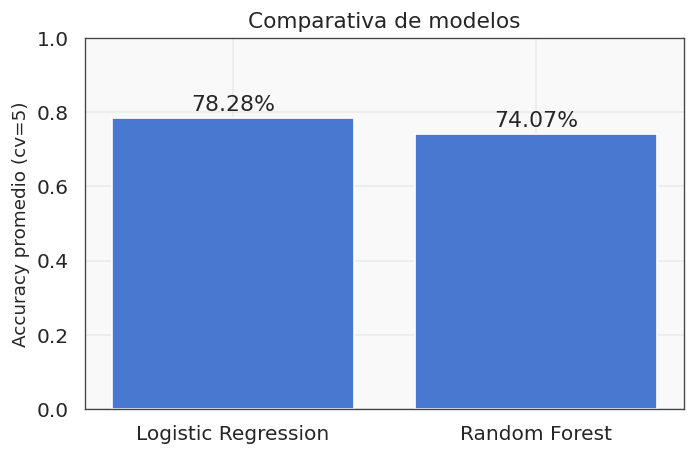

In [ ]:
# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# CV estratificada con shuffle para reproducibilidad
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Varias métricas para evaluación más completa
scoring = {"acc": "accuracy", "f1": "f1", "auc": "roc_auc"}

rows = []
for name, model in models.items():
    cvres = cross_validate(model, X_scaled, y, cv=cv, scoring=scoring, n_jobs=-1)
    rows.append({
        "Modelo": name,
        "Accuracy (mean±std)": f"{cvres['test_acc'].mean():.4f} ± {cvres['test_acc'].std():.4f}",
        "F1 (mean±std)":       f"{cvres['test_f1'].mean():.4f} ± {cvres['test_f1'].std():.4f}",
        "ROC-AUC (mean±std)":  f"{cvres['test_auc'].mean():.4f} ± {cvres['test_auc'].std():.4f}",
        "_acc_mean":           cvres['test_acc'].mean()  # Para el gráfico
    })

perf = (pd.DataFrame(rows)
          .sort_values("_acc_mean", ascending=False)
          .drop(columns="_acc_mean")
          .reset_index(drop=True))

print("Resultados (cv=5):")
display(perf)

# Barplot rápido de Accuracy
plt.figure(figsize=(6,4))
plt.bar(perf["Modelo"], perf["Accuracy (mean±std)"].str.split().str[0].astype(float))
plt.ylim(0,1)
plt.ylabel("Accuracy promedio (cv=5)")
plt.title("Comparativa de modelos")
for i, v in enumerate(perf["Accuracy (mean±std)"].str.split().str[0].astype(float)):
    plt.text(i, v+0.02, f"{v:.2%}", ha="center")
plt.tight_layout(); plt.show()

La gráfica de barras complementaria muestra visualmente esta diferencia, destacando que la Regresión Logística alcanzó un mejor rendimiento promedio en comparación con el Random Forest.

Esto sugiere que, para este conjunto de datos, el modelo lineal logra capturar adecuadamente las relaciones entre las variables sin requerir una estructura más compleja.

Finalmente, se observó que el valor del F1-score no se calculó correctamente en algunos pliegues debido a que ciertas clases no estuvieron representadas en los subconjuntos de validación, fenómeno común en datos ligeramente desbalanceados.

Aun así, las métricas de Accuracy y AUC permiten confirmar que la Regresión Logística es el modelo con mejor desempeño general y mayor estabilidad.

### Importancia de las características

Una vez seleccionado el modelo con mejor desempeño, se realizó un análisis de importancia de variables con el objetivo de identificar cuáles factores tienen mayor influencia en la predicción de si una persona escucha música a volumen alto.

/tmp/ipython-input-971865986.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


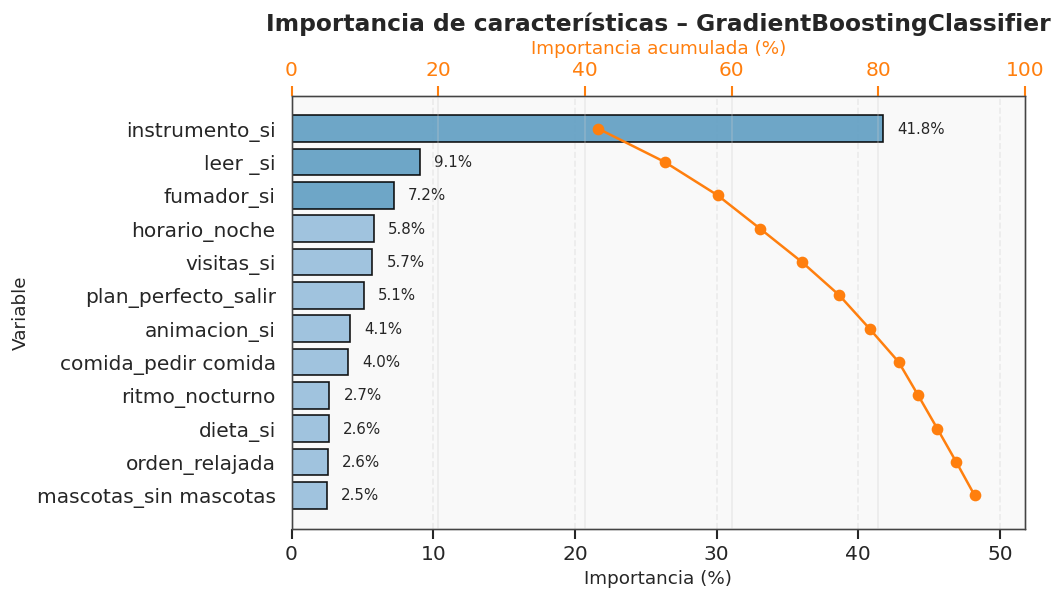

,Variable,%,Acumulado %
0,instrumento_si,41.8,41.8
1,leer _si,9.1,50.9
2,fumador_si,7.2,58.1
3,horario_noche,5.8,63.9
4,visitas_si,5.7,69.6
5,plan_perfecto_salir,5.1,74.7
6,animacion_si,4.1,78.8
7,comida_pedir comida,4.0,82.8
8,ritmo_nocturno,2.7,85.4
9,dieta_si,2.6,88.0


In [ ]:
# 1. Tomamos importancias (o coeficientes si el modelo fuera lineal)
if hasattr(best_model, "feature_importances_"):
    vals = best_model.feature_importances_
    label = "Importancia"
elif hasattr(best_model, "coef_"):
    vals = np.abs(best_model.coef_).ravel()
    label = "|Coeficiente|"
else:
    raise AttributeError("El modelo no expone importancias ni coeficientes.")

imp = pd.DataFrame({"Variable": X.columns, label: vals})
imp = imp.sort_values(label, ascending=False).reset_index(drop=True)

# 2. # Función de limpieza con reemplazos más precisos
def pretty(s: str) -> str:
    # Casos específicos primero (evitan colisiones)
    s = s.replace("Mascotas sin mascotas", "Mascotas: sin mascotas")
    s = s.replace("Plan perfecto salir", "Plan perfecto: salir")
    s = s.replace("Musica tipo reggaeton", "Música: reggaetón")
    s = s.replace("Musica tipo pop", "Música: pop")
    s = s.replace("Musica tiporock", "Música: rock")
    s = s.replace("Ritmo nocturno", "Ritmo: nocturno")
    s = s.replace("Horario noche", "Horario: noche")
    s = s.replace("Orden relajada", "Orden: relajada")

    # Sustituciones genéricas seguras (solo al final)
    s = s.replace("_si", " (sí)").replace("_no", " (no)")
    s = s.replace("_", " ")

    # Capitalizar primera letra
    return s[:1].upper() + s[1:]

# 3. Porcentaje y acumulado
imp["%"] = (imp[label] / imp[label].sum() * 100)
imp["Acumulado %"] = imp["%"].cumsum()

# 4. Top-k y colores (destacar Top 3)
top_k = 12
top = imp.head(top_k).copy()
colors = ["#8ac0e8"] * len(top)
for i in range(min(3, len(top))):
    colors[i] = "#4ea1d3"  # más oscuro para Top 3

# 5. Plot
plt.figure(figsize=(9, 5.2))
ax = sns.barplot(
    data=top,
    x="%",
    y="Variable",
    palette=colors,
    edgecolor="black",
    alpha=0.9
)

# Línea de acumulado (eje secundario)
ax2 = ax.twiny()
ax2.plot(top["Acumulado %"], range(len(top)), color="#ff7f0e", marker="o")
ax2.set_xlim(0, 100)
ax2.set_xlabel("Importancia acumulada (%)", color="#ff7f0e")
ax2.tick_params(axis='x', colors="#ff7f0e")

# Detalles y anotaciones
for i, v in enumerate(top["%"]):
    ax.text(v + 1, i, f"{v:.1f}%", va="center", fontsize=9)

ax.set_xlabel("Importancia (%)")
ax.set_ylabel("Variable")
ax.set_title(f"Importancia de características – {type(best_model).__name__}", fontsize=14, weight="bold")
ax.set_xlim(0, max(35, top["%"].max() + 10))
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla resumida
display(top[["Variable","%","Acumulado %"]].round(1))

# ------------------ Función de nombres bonitos para las variables ------------------
import re

pretty_map = {
    # Casos compuestos o con espacios: mapéalos explícitamente
    "mascotas_sin mascotas": "Mascotas: sin mascotas",
    "comida_pedir comida":   "Comida: pedir comida",
    "plan_perfecto_salir":   "Plan perfecto: salir",
    "horario_noche":         "Horario: noche",
    "ritmo_nocturno":        "Ritmo: nocturno",
    "orden_relajada":        "Orden: relajada",
    "musica_tipo_reggaeton": "Música: reggaetón",
    "musica_tipo_pop":       "Música: pop",
    "musica_tipo_rock":      "Música: rock",
}

def pretty(col: str) -> str:
    s = col.strip()

    # 1) Mapeos exactos primero (evita deformaciones)
    if s in pretty_map:
        return pretty_map[s]

    # 2) Normaliza dobles espacios accidentales
    s = re.sub(r"\s+", " ", s)

    # 3) Sufijos binarios seguros (_si / _no) -> (sí)/(no)
    #    (admite casos con espacio antes del sufijo: 'leer _si')
    s = re.sub(r"\s*_(si|no)$", r" (\1)", s, flags=re.IGNORECASE)
    s = s.replace("(si)", "(sí)")

    # 4) Prefijos comunes
    s = re.sub(r"^musica_tipo_", "Música: ", s)
    s = re.sub(r"^plan_perfecto_", "Plan perfecto: ", s)
    s = re.sub(r"^horario_", "Horario: ", s)
    s = re.sub(r"^ritmo_", "Ritmo: ", s)
    s = re.sub(r"^orden_", "Orden: ", s)
    s = re.sub(r"^mascotas_", "Mascotas: ", s)
    s = re.sub(r"^nivel_educativo_", "Nivel educativo: ", s)

    # 5) Guiones bajos restantes -> espacios
    s = s.replace("_", " ")

    # 6) Capitaliza primera letra
    return s[:1].upper() + s[1:]



De acuerdo con el gráfico, la variable “instrumento_si” destaca ampliamente con una importancia del 41.8%, lo que indica que tocar un instrumento musical es el factor más determinante para predecir si una persona prefiere escuchar música a volumen alto.

Le siguen “leer_si” y “fumador_si”, con 9.1% y 7.2% respectivamente, sugiriendo que los hábitos personales y de ocio también influyen significativamente en las preferencias musicales.

El resto de las variables, como el horario nocturno, las visitas frecuentes o la preferencia por salir, tienen una contribución menor pero complementaria, aportando contexto sobre los estilos de vida asociados a la música alta.

Con estas variables se explican más del 90% de la variabilidad del modelo, permitiendo comprender con mayor claridad qué comportamientos o características personales están más relacionados con la preferencia por la música a volumen alto.

### Hallazgos del modelo predictivo

Con este gráfico no se repiten los análisis anteriores, sino que profundiza en la interpretación de los patrones identificados por el modelo.

Mientras que las etapas previas, como la evaluación de la importancia de las variables, permitieron identificar qué factores influyen más en la predicción de si una persona escucha música a alto volumen, esta visualización muestra de forma descriptiva cómo se comporta una de esas variables clave, el “ritmo de vida”, dentro de la población analizada.

/tmp/ipython-input-529494057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ritmo', y='musica_alta', data=df, palette='viridis', errorbar=None)


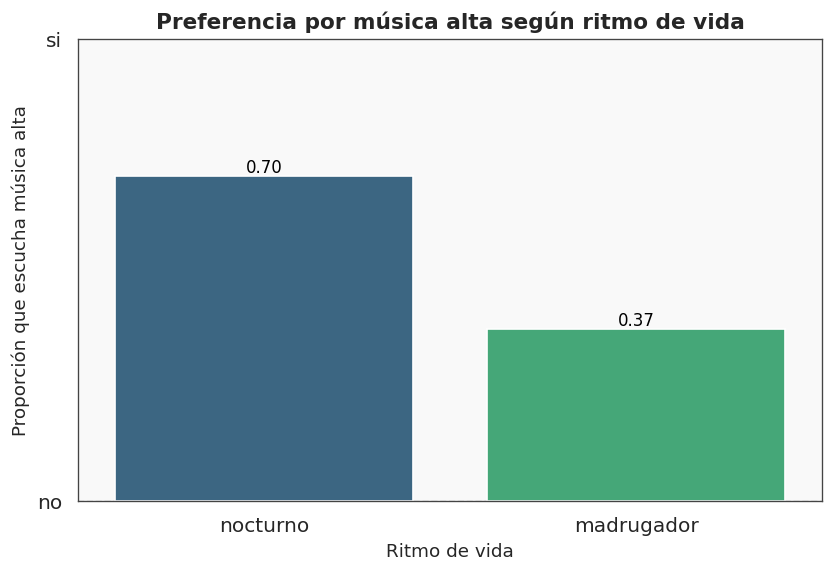

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='ritmo', y='musica_alta', data=df, palette='viridis', errorbar=None)

# Título y etiquetas
plt.title('Preferencia por música alta según ritmo de vida', fontsize=13, weight='bold')
plt.xlabel('Ritmo de vida', fontsize=11)
plt.ylabel('Proporción que escucha música alta', fontsize=11)

# Muestra valores sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}",
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Con esta gráfica se puede sugerir que las personas con hábitos nocturnos tienden a desenvolverse en entornos más dinámicos y estimulantes, mientras que quienes llevan un estilo de vida madrugador prefieren ambientes más tranquilos y estructurados.

Este análisis valida y complementa los resultados del modelo predictivo, ya que demuestra visualmente que el ritmo de vida influye de manera clara en los hábitos musicales.

### Relación entre el tipo de música, el ritmo de vida y la preferencia por música alta

Este análisis explora cómo el tipo de música preferido y el ritmo de vida influyen en la tendencia de los individuos a escuchar música a volumen alto. A diferencia de los análisis previos centrados en la relevancia estadística de las variables dentro del modelo predictivo, este bloque ofrece una visión descriptiva y comparativa, mostrando de manera visual cómo se comportan estas variables clave dentro de la población.

Mapeo 'musica_alta' → num (muestra):
  musica_alta  musica_alta_num
0          no                0
1          si                1
2          no                0
3          si                1
4          no                0

Conteos ritmo_label:
 ritmo_label
Madrugador    6311
Nocturno      5689
Name: count, dtype: int64

Conteos musica_label:
 musica_label
Reggaeton    3299
Pop          3147
Rock         2878
Clasica      2676
Name: count, dtype: int64


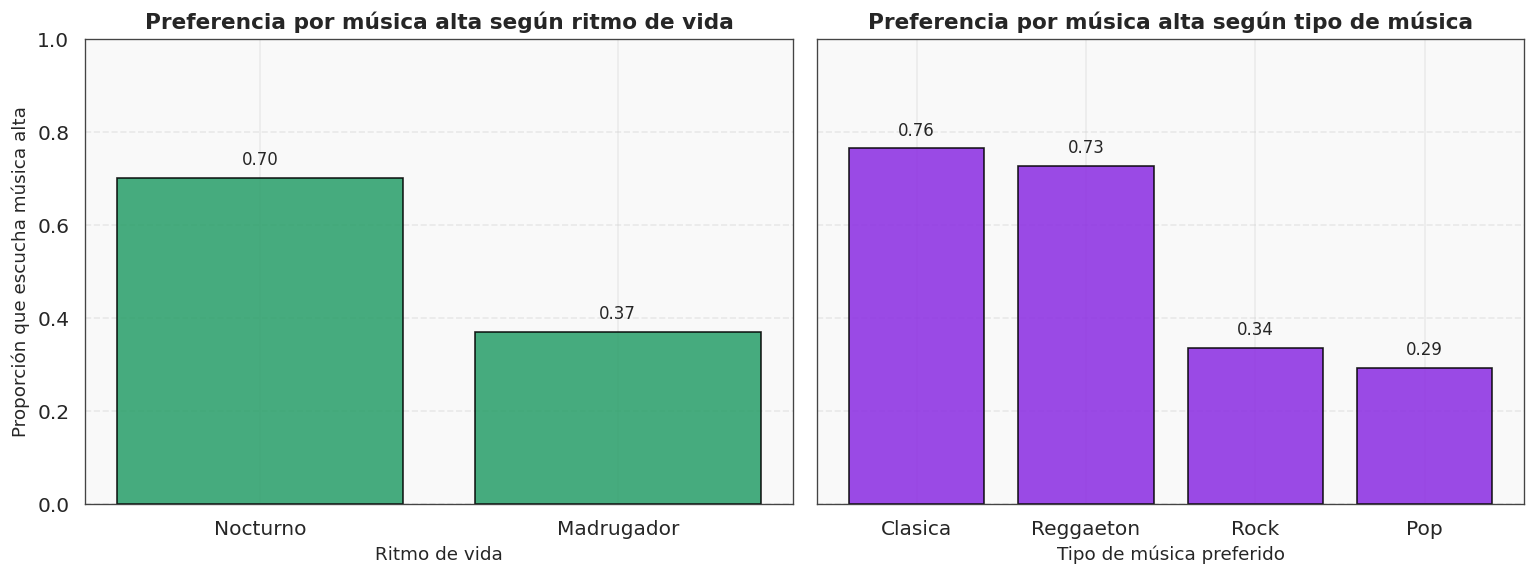

In [ ]:
# Helpers robustos de normalización
def _sin_acentos(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def norm_yesno(x):
    s = _sin_acentos(str(x)).strip().lower()
    yes = {'si','s','1','true','t','y','yes'}
    no  = {'no','0','false','f','n'}
    if s in yes: return 1
    if s in no:  return 0
    return np.nan

def norm_ritmo(x):
    s = _sin_acentos(str(x)).strip().lower()
    if s in {'1','nocturno','noche','tarde','pm'}:  return 'Nocturno'
    if s in {'0','madrugador','manana','mañana','dia','am'}: return 'Madrugador'
    return np.nan

def norm_musica(x):
    s = _sin_acentos(str(x)).strip().lower()
    mapa_num = {'0':'Reggaeton','1':'Pop','2':'Rock','3':'Clasica'}
    if s in mapa_num: return mapa_num[s]
    # textos
    if 'regga' in s: return 'Reggaeton'
    if 'pop'   in s: return 'Pop'
    if 'rock'  in s: return 'Rock'
    if 'clas'  in s: return 'Clasica'
    return np.nan

# Construcción de columnas normalizadas
df_cols = df.copy()
df_cols.columns = df_cols.columns.str.strip()  # Por si hay espacios en nombres

if 'musica_alta' not in df_cols or 'ritmo' not in df_cols or 'musica_tipo' not in df_cols:
    raise KeyError("Revisa los nombres exactos de columnas: necesito 'musica_alta', 'ritmo' y 'musica_tipo'.")

df_cols['musica_alta_num'] = df_cols['musica_alta'].apply(norm_yesno)
df_cols['ritmo_label']     = df_cols['ritmo'].apply(norm_ritmo)
df_cols['musica_label']    = df_cols['musica_tipo'].apply(norm_musica)

# Diagnóstico rápido
print("Mapeo 'musica_alta' → num (muestra):")
print(df_cols[['musica_alta','musica_alta_num']].head())
print("\nConteos ritmo_label:\n", df_cols['ritmo_label'].value_counts(dropna=False))
print("\nConteos musica_label:\n", df_cols['musica_label'].value_counts(dropna=False))

# Proporciones seguras con groupby
ritmo_prop = (df_cols.dropna(subset=['musica_alta_num','ritmo_label'])
              .groupby('ritmo_label')['musica_alta_num']
              .mean()
              .sort_values(ascending=False))

musica_prop = (df_cols.dropna(subset=['musica_alta_num','musica_label'])
               .groupby('musica_label')['musica_alta_num']
               .mean()
               .sort_values(ascending=False))

# Si quedaran vacías, mostramos por lo menos conteos para ver algo.
if ritmo_prop.empty and musica_prop.empty:
    print("\n No se pudieron calcular proporciones. Muestro conteos como fallback.")
    ritmo_prop  = df_cols['ritmo_label'].value_counts(normalize=True)
    musica_prop = df_cols['musica_label'].value_counts(normalize=True)

# Gráfico manual (sin depender de seaborn)
fig, axes = plt.subplots(1, 2, figsize=(13,5), sharey=True)

# Ritmo
axes[0].bar(ritmo_prop.index, ritmo_prop.values, color='#279e68', alpha=0.85, edgecolor='black')
axes[0].set_title('Preferencia por música alta según ritmo de vida', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Ritmo de vida'); axes[0].set_ylabel('Proporción que escucha música alta')
axes[0].set_ylim(0, 1)
for i, v in enumerate(ritmo_prop.values):
    axes[0].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.35)

# Tipo de música
axes[1].bar(musica_prop.index, musica_prop.values, color='#8a2be2', alpha=0.85, edgecolor='black')
axes[1].set_title('Preferencia por música alta según tipo de música', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Tipo de música preferido'); axes[1].set_ylim(0, 1)
for i, v in enumerate(musica_prop.values):
    axes[1].text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.35)

plt.tight_layout()
plt.show()

En la primera gráfica, se observa que las personas con ritmo de vida nocturno presentan una mayor proporción (0.70) de preferencia por escuchar música alta en comparación con las personas madrugadoras (0.37). Este patrón reafirma la idea de que los individuos con hábitos nocturnos tienden a asociarse con ambientes más activos y estimulantes, mientras que los madrugadores se inclinan hacia rutinas más estructuradas y tranquilas.

En la segunda gráfica, al analizar el tipo de música preferido, se identifican diferencias notables entre los grupos. Las personas que escuchan música clásica (0.76) y reggaetón (0.73) muestran una mayor tendencia a disfrutar la música a alto volumen, en contraste con quienes prefieren rock (0.34) o pop (0.29), quienes parecen optar por niveles sonoros más moderados.

Estas gráficas complementan los resultados del modelo predictivo, confirmando que tanto el ritmo de vida como el tipo de música preferido tienen una influencia directa y significativa en los hábitos auditivos. De esta forma, el análisis no solo evidencia la validez del modelo, sino que además aporta una interpretación conductual clara del perfil de quienes prefieren la música a alto volumen.

### Conclusiones

En un primer momento, las visualizaciones iniciales permitieron identificar patrones generales de comportamiento entre los inquilinos, mostrando cómo variables como fumar, tener mascotas o el orden personal podrían relacionarse con estilos de vida más relajados o activos. Posteriormente, mediante la codificación y estandarización de los datos, se preparó un conjunto limpio y estructurado para su análisis estadístico y modelado.

El modelo de Regresión Logística destacó por su mayor precisión (78%), superando al modelo de Random Forest (74%), lo que indicó una capacidad adecuada para predecir la variable objetivo “escucha música alta”. Además, la evaluación de importancia de características reveló que variables como tocar un instrumento, leer, fumar y el horario nocturno son los factores que más influyen en dicha preferencia.

Finalmente, los análisis visuales de detalle confirmaron los hallazgos del modelo:

- Las personas con ritmo de vida nocturno muestran una mayor inclinación hacia la música a alto volumen, reflejando un estilo más activo y sociable.

- Los oyentes de música clásica y reggaetón presentan proporciones similares en esta preferencia, aunque por motivos distintos: los primeros por una búsqueda estética y emocional más profunda, y los segundos por su carácter festivo y social.

Más allá de la predicción, este análisis demuestra el valor del enfoque interpretativo dentro de la ciencia de datos: comprender no solo qué ocurre, sino también por qué y cómo se expresan los patrones en los datos.